In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, Input, BatchNormalization, MaxPooling2D
import numpy as np
from sklearn.model_selection import train_test_split

In [21]:
df_train = pd.read_csv('./data/fmnist_train.csv')
df_test = pd.read_csv('./data/fmnist_test.csv')

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Проверим на пустые значения и удалим их (при наличии)

In [3]:
na_df_train = df_train.isna().sum(axis=1)
print('Изображения с "битыми" (пустыми) пикселями: ', 
      ', '.join(na_df_train.loc[na_df_train>0].index.astype(str)))

Изображения с "битыми" (пустыми) пикселями:  17039


In [4]:
df_train_preprocessed = df_train.drop(17039)

Визуализируем некоторые картинки для того, чтобы увидеть, что подается на вход модели

In [5]:
df_pixels = df_train_preprocessed.drop(['label', 'Id'], axis=1)

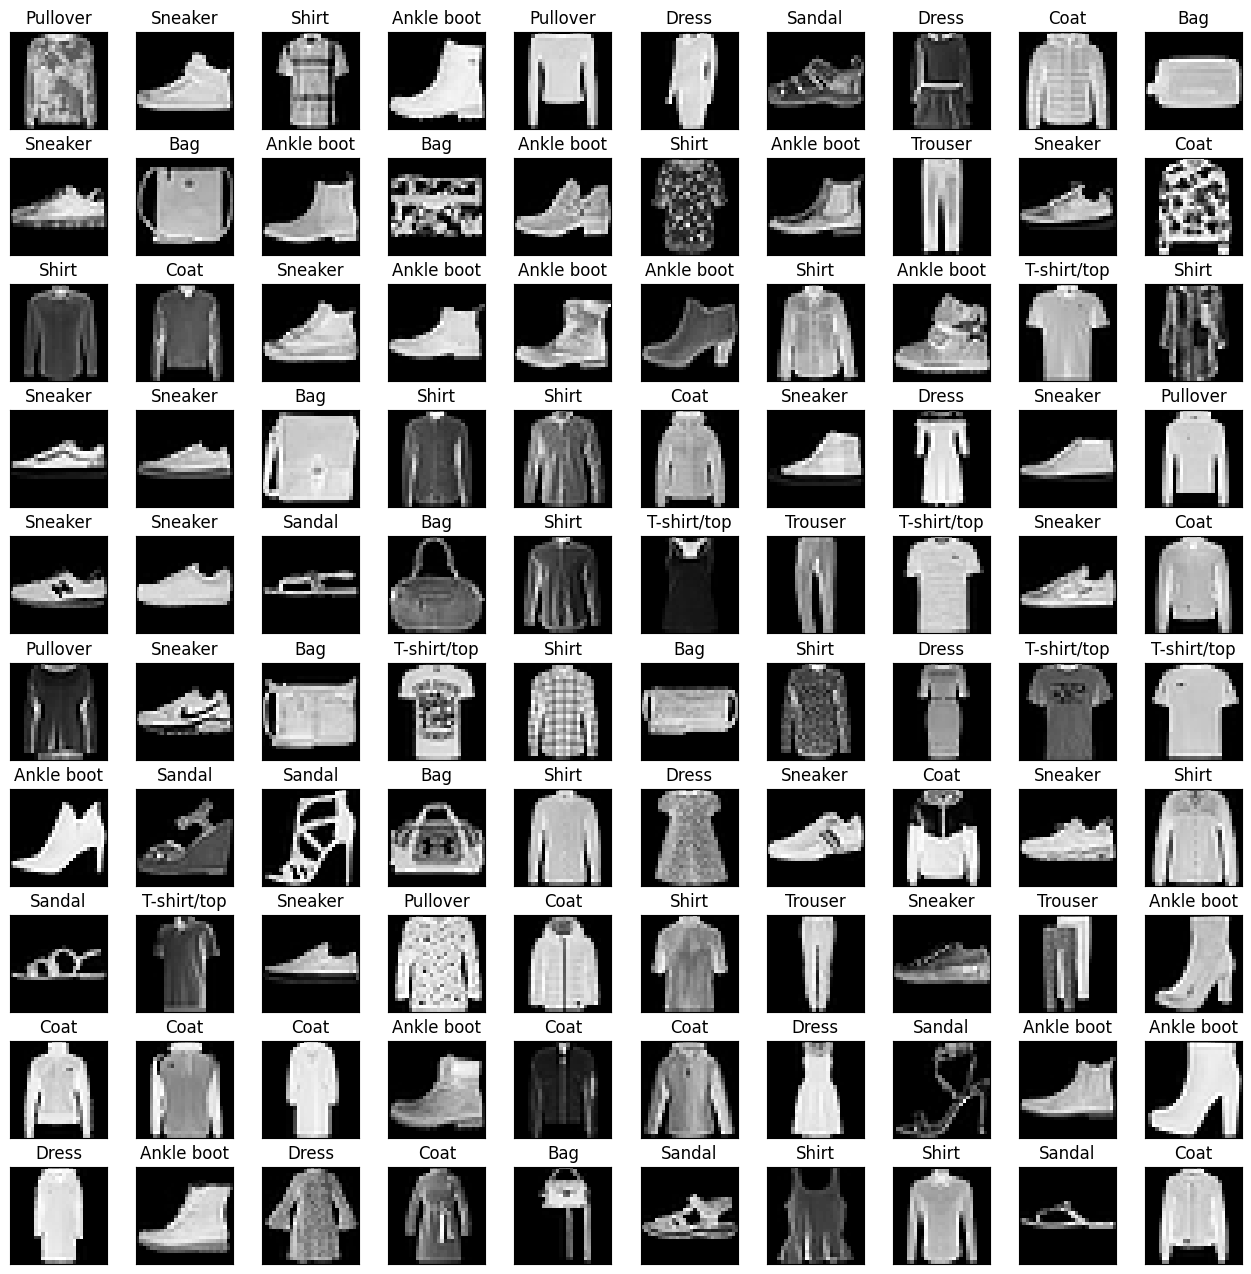

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(16, 16))
n=1
for i in np.random.randint(0, len(df_train_preprocessed), size=100):
    plt.subplot(10, 10, n) # Делим фигуру на 100 частей
    # Настройка для красивого отображения
    plt.xticks([])
    plt.yticks([])
    plt.imshow(df_pixels.iloc[i].values.reshape((28,28)), cmap = "gray")
    label_index = int(df_train_preprocessed['label'][i])
    plt.title(class_names[label_index])
    plt.subplots_adjust(hspace=0.3)
    n+=1
plt.show()

Посмотрев на изображения и оценив их можно говорить о том, что проиндексированы они верно.

Посмотрим распределение разных классов для оценки качества датасета

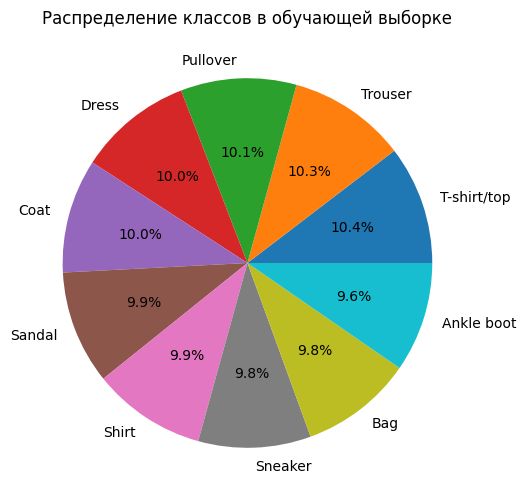

In [7]:
# Строим диаграмму распределения классов в обучающей выборке
plt.figure(figsize=(10, 6))
plt.pie(df_train_preprocessed['label'].value_counts(), labels=class_names, autopct='%1.1f%%')
plt.title('Распределение классов в обучающей выборке')
plt.show()

Увидев, что классы достаточно сбалансированы и нет необходимости в их ребалансировке, можно приступить к созданию и обучению модели.

In [8]:
# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df_pixels, df_train_preprocessed['label'], test_size=0.2, random_state=42)
# Сделаем преобразование в тензоры с размером 28x28
X_train_reshaped = X_train.values.reshape((len(X_train), 28, 28))
X_test_reshaped = X_test.values.reshape((len(X_test), 28, 28))
# Масштабируем тензоры в значения от 0 до 1
X_train_scaled = X_train_reshaped / 255.0
X_test_scaled = X_test_reshaped / 255.0

In [9]:
# Построение модели
model = Sequential()
model.add(Input(shape=(28, 28, 1))) # добавляем входной слой равным 28х28 и 1 каналу
model.add(Conv2D(30, kernel_size=(3, 3),
                 strides=2,
                 activation='relu')) # один сверточный слой с 30 фильтрами
model.add(Dropout(0.5)) # Dropout для предотвращения переобучения
model.add(Conv2D(30, kernel_size=(3, 3),
                 strides=2,
                 activation='relu')) # второй сверточный слой с 30 фильтрами
model.add(Dropout(0.5)) 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) # добавляем выходной слой на 10 классов

In [10]:
# Компилирование модели
model.compile(
    optimizer='adam',  # или tf.keras.optimizers.Adam(learning_rate=0.001)
    loss='sparse_categorical_crossentropy',  # если метки - целые числа (0, 1, ...)
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_test_scaled, y_test)  # или validation_split=0.2
)

Epoch 1/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5726 - loss: 1.1630 - val_accuracy: 0.8031 - val_loss: 0.5467
Epoch 2/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7904 - loss: 0.5635 - val_accuracy: 0.8225 - val_loss: 0.4897
Epoch 3/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8059 - loss: 0.5132 - val_accuracy: 0.8430 - val_loss: 0.4411
Epoch 4/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8218 - loss: 0.4806 - val_accuracy: 0.8313 - val_loss: 0.4432
Epoch 5/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8250 - loss: 0.4537 - val_accuracy: 0.8615 - val_loss: 0.3861
Epoch 6/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8378 - loss: 0.4315 - val_accuracy: 0.8562 - val_loss: 0.3903
Epoch 7/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8491 - loss: 0.4096 - val_accuracy: 0.8633 - val_loss: 0.3712
Epoch 8/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8511 - loss: 0.4043 - val_accuracy: 0.

In [12]:
score = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

Test loss: 0.3517568111419678
Test accuracy: 0.8714788556098938


Видим, что есть некоторый результат от нашего обучения. Однако постараемся улучшить его, изменив слои нейронной сети.

In [ ]:
# Построение улучшенной модели
model_2 = Sequential([
    Input(shape=(28, 28, 1)),# входной слой, как и в первой модели

    # Строим модель 
    Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),  # Увеличиваем число фильтров
    BatchNormalization(),  # добавляем слои нормализации
    MaxPooling2D(pool_size=(2, 2)),  # Уменьшаем размерность
    Dropout(0.25),  # Добавляем слой Dropout (меньше для того, чтобы не нарушать связность сети)
    # Второй блок из тех же слоев
    Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),  # Больше фильтров
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Третий блок из тех же слоев
    Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Выходной слой
    Flatten(),
    Dense(256, activation='relu'),  # Увеличиваем число нейронов
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [16]:
# Компилирование модели
model_2.compile(
    optimizer='adam',  # или tf.keras.optimizers.Adam(learning_rate=0.001)
    loss='sparse_categorical_crossentropy',  # если метки - целые числа (0, 1, ...)
    metrics=['accuracy']
)

In [17]:
history = model_2.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_test_scaled, y_test)  # или validation_split=0.2
)

Epoch 1/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.6237 - loss: 1.1710 - val_accuracy: 0.5549 - val_loss: 1.4649
Epoch 2/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7980 - loss: 0.5627 - val_accuracy: 0.8407 - val_loss: 0.4177
Epoch 3/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8341 - loss: 0.4524 - val_accuracy: 0.8627 - val_loss: 0.3858
Epoch 4/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8550 - loss: 0.3997 - val_accuracy: 0.8724 - val_loss: 0.3393
Epoch 5/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8595 - loss: 0.3830 - val_accuracy: 0.8756 - val_loss: 0.3667
Epoch 6/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8701 - loss: 0.3549 - val_accuracy: 0.8815 - val_loss: 0.3177
Epoch 7/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8757 - loss: 0.3383 - val_accuracy: 0.8727 - val_loss: 0.3449
Epoch 8/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8789 - loss: 0.3298 - val_acc

In [23]:
score = model_2.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

Test loss: 0.2741539180278778
Test accuracy: 0.8993544578552246


После построение удовлетворительной модели прогнозируем результат

In [26]:
X_validate_preprocessed = df_test.drop(columns=['Id'])

# Проводим предобработку
X_validate_reshaped = X_validate_preprocessed.values.reshape((len(X_validate_preprocessed), 28, 28))
# Масштабируем тензоры в значения от 0 до 1
X_validate_scaled = X_validate_reshaped / 255.0

In [34]:
predictions = model_2.predict(X_validate_scaled)
classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [43]:
df_result = pd.DataFrame(classes, columns=['label'])
df_result.to_csv('./data/result.csv')

# Скриншот Kaggle
![Скриншот](image.png)